# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

## Paso 1: Instalación de dependencias

Hecho

## Paso 2: Descargar HTML

In [9]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://companies-market-cap-copy.vercel.app/index.html"
respuesta = requests.get(url)
contenido = respuesta.text
contenido

'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="ic

## Paso 3: Transforma el HTML

In [10]:
soup = BeautifulSoup(contenido,"html.parser")
tabla = soup.find("table")  
tabla


<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [11]:
rows = tabla.find_all("tr")
data = []
for row in rows[1:]:  # Saltar la fila de encabezado
    cols = row.find_all("td")
    fecha = cols[0].text.strip()
    ingresos = cols[1].text.strip()
    data.append([fecha, ingresos])
data

[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [12]:
# Crear un DataFrame con los datos extraídos parara poder analizar
df = pd.DataFrame(data, columns=["Fecha", "Ingresos"])
# Ordenar los datos por Fecha de menor a mayor 
df = df.sort_values("Fecha")
df

,Fecha,Ingresos
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B
10,2014,$3.19 B
9,2015,$4.04 B
8,2016,$7.00 B
7,2017,$11.75 B
6,2018,$21.46 B


## Paso 4: Procesa el DataFrame

In [13]:
# Proceso de Limpieza y conversion 
def convertir_ingresos(valor):
    if "B" in valor:
        editar_valor = float(valor.replace("B", "").replace("$", "").replace(",", ""))
        return editar_valor
df["Ingresos"] = df["Ingresos"].apply(convertir_ingresos)
df["Ingresos"]

15     0.11
14     0.11
13     0.20
12     0.41
11     2.01
10     3.19
9      4.04
8      7.00
7     11.75
6     21.46
5     24.57
4     31.53
3     53.82
2     81.46
1     96.77
0     97.15
Name: Ingresos, dtype: float64

## Paso 5: almacenar los datos en sqlite

In [14]:
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos (
    fecha TEXT,
    ingresos REAL
)
""")

In [15]:
for index, row in df.iterrows():
    cursor.execute("INSERT INTO ingresos (fecha, ingresos) VALUES (?, ?)", (row["Fecha"], row["Ingresos"]))

conn.commit()
conn.close()

## Paso 6: Visualiza los datos

Podemos realizar varios tipos de visualizacion como por ejemplo: gráficas estáticas, animadas e interactivas, pero voy a fijarlo en modo estática


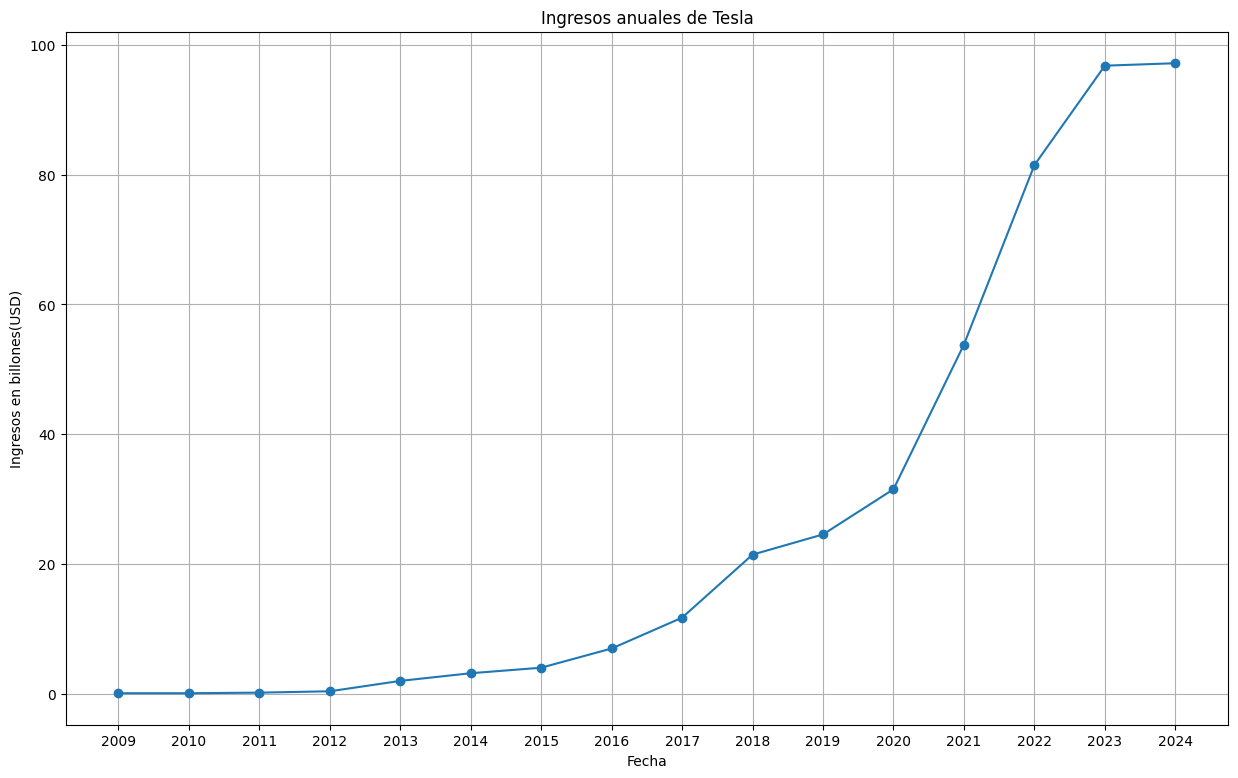

In [17]:
# Graficar los datos
print(f"Podemos realizar varios tipos de visualizacion como por ejemplo: gráficas estáticas, animadas e interactivas, pero voy a fijarlo en modo estática")
plt.figure(figsize=(15, 9))
plt.plot(df["Fecha"], df["Ingresos"], marker='o', label="Ingresos")
plt.title("Ingresos anuales de Tesla")
plt.xlabel("Fecha")
plt.ylabel("Ingresos en billones(USD)")
plt.grid(True)
plt.savefig("revenue_plotwist.png")
plt.show()